Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [916]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [903]:
df = pd.read_excel('Election_Data.xlsx')
print('Fig. 1')
df.head(10)

Fig. 1


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [909]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [910]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [968]:
df.shape

(1525, 9)

In [1303]:
df.groupby('vote')['age'].median()

vote
Conservative    58.0
Labour          51.0
Name: age, dtype: float64

In [912]:
print('Fig. 2\n')
df.info()

Fig. 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [65]:
df['vote'].value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

In [66]:
df['gender'].value_counts(normalize=True)

female    0.53263
male      0.46737
Name: gender, dtype: float64

In [58]:
dups = df[df.duplicated()]
dups

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [59]:
df.drop_duplicates(inplace=True)

In [913]:
print('Fig. 3\n')
df.describe().T

Fig. 3



,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [908]:
print('Fig. 4\n')
df.describe(include='object').T

Fig. 4



,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [51]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [84]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

1. Data set contains 9 columns namely: 'vote', 'age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge' and 'gender'
2. Target variable in the data set is: 'vote'
3. There are 1525 rows of data in the data set.
4. 7 features are of interger data type and 2 features are of object data type.
5. There are no null values in the data set.
6. There are two voting parties. Maximum accounts for 'Labour' party with a frequency 1063.
7. Distribution of the target variable is 69.7% of Labour party and 30.3% of Conservative party.
9. Data consists of 53.2% Female voters and 46.8% Male voters.
11. There are some duplicate entries present in the data set. we need to clean them before building our Machine Learning Model.
12. There are outliers present.
13. 75% of the voters on a 11-point scale that measures respondents attitudes toward European integration represent high ‘Eurosceptic’ sentiment with a maximum scale of 11 and a minimum scale of 1.


1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [61]:
print('Number of rows after removing duplicate records: %d' % df.shape[0])

Number of rows after removing duplicate records: 1517


In [922]:
df.duplicated().sum()

8

In [923]:
df['age'].skew()

0.14462077228942483

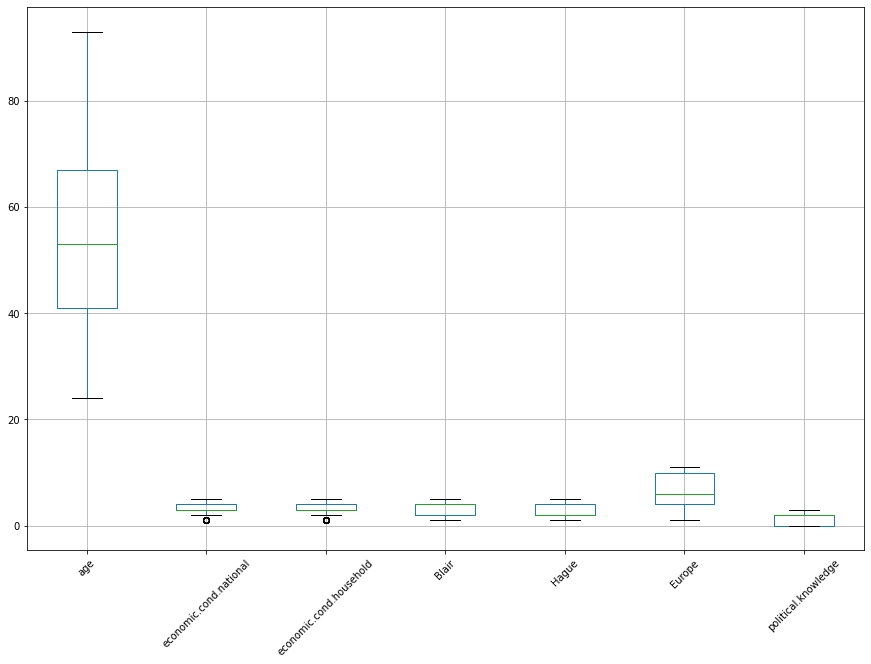

In [74]:
df.boxplot(figsize=(15,10))
plt.xticks(rotation=45);

1. It is clear that there are no duplicate entries in the data set 
2. We had 1525 rows initially and there are 1517 rows after removing the duplicate entries.
3. There are some outliers present in economic.cond.national and economic.cond.household

## Univariate Analysis:
    



In [947]:
def univariate_analysis_numeric(column):
    print('Description of:' + column)
    print('---------------------------------------------------------')
    print(df[column].describe(), end='')
    print('')
    print('---------------------------------------------------------')
    print('Skewness of:'+ column, df[column].skew())
    print('---------------------------------------------------------')
    plt.figure()
    print('Distribution of:' + column)
    print('---------------------------------------------------------')
    sns.displot(df[column], kde=True)
    plt.show()
    
    plt.figure()
    print('BoxPlot of:' + column)
    print('---------------------------------------------------------')
    sns.boxplot(df[column])
    plt.show()
    

Fig. 5
Description of:age
---------------------------------------------------------
count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64
---------------------------------------------------------
Skewness of:age 0.14462077228942483
---------------------------------------------------------
Distribution of:age
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

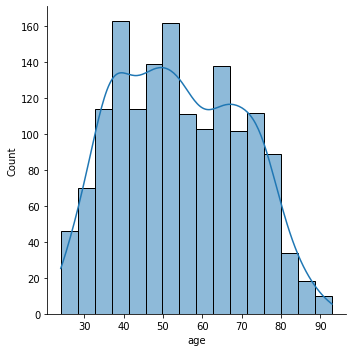

BoxPlot of:age
---------------------------------------------------------


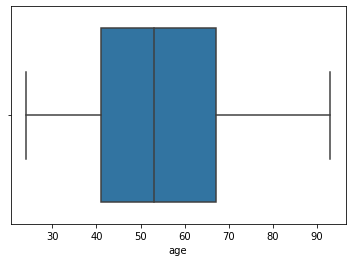

In [948]:
print('Fig. 5')
univariate_analysis_numeric('age')

Fig. 6
Description of:economic.cond.national
---------------------------------------------------------
count    1525.000000
mean        3.245902
std         0.880969
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64
---------------------------------------------------------
Skewness of:economic.cond.national -0.2404528899412957
---------------------------------------------------------
Distribution of:economic.cond.national
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

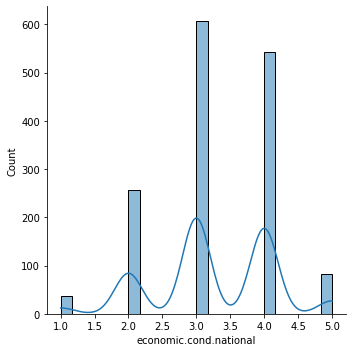

BoxPlot of:economic.cond.national
---------------------------------------------------------


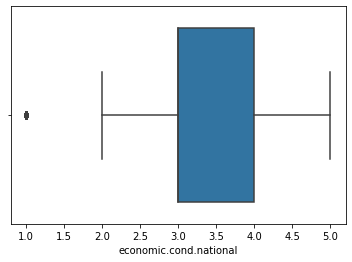

In [949]:
print('Fig. 6')
univariate_analysis_numeric('economic.cond.national')

Fig. 7
Description of:economic.cond.household
---------------------------------------------------------
count    1525.000000
mean        3.140328
std         0.929951
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64
---------------------------------------------------------
Skewness of:economic.cond.household -0.14955204997804528
---------------------------------------------------------
Distribution of:economic.cond.household
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

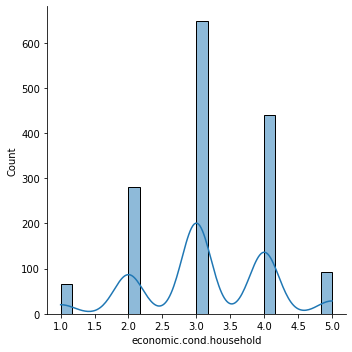

BoxPlot of:economic.cond.household
---------------------------------------------------------


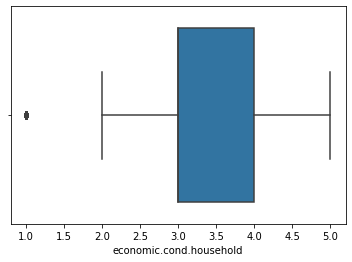

In [950]:
print('Fig. 7')
univariate_analysis_numeric('economic.cond.household')

Fig. 8
Description of:Blair
---------------------------------------------------------
count    1525.000000
mean        3.334426
std         1.174824
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64
---------------------------------------------------------
Skewness of:Blair -0.5354186518673825
---------------------------------------------------------
Distribution of:Blair
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

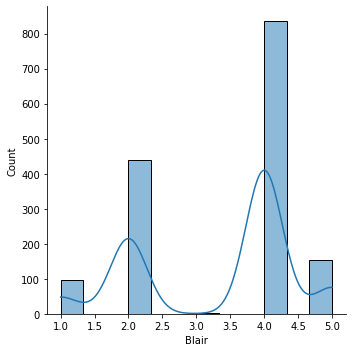

BoxPlot of:Blair
---------------------------------------------------------


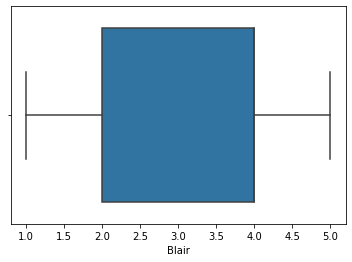

In [951]:
print('Fig. 8')
univariate_analysis_numeric('Blair')

Fig. 9
Description of:Hague
---------------------------------------------------------
count    1525.000000
mean        2.746885
std         1.230703
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64
---------------------------------------------------------
Skewness of:Hague 0.1520996272526911
---------------------------------------------------------
Distribution of:Hague
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

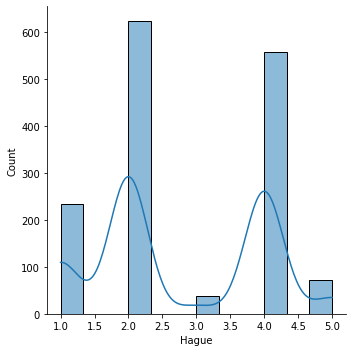

BoxPlot of:Hague
---------------------------------------------------------


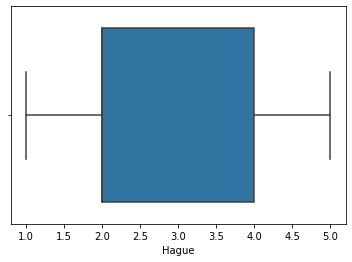

In [952]:
print('Fig. 9')
univariate_analysis_numeric('Hague')

Fig. 10
Description of:Europe
---------------------------------------------------------
count    1525.000000
mean        6.728525
std         3.297538
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64
---------------------------------------------------------
Skewness of:Europe -0.13594670991422228
---------------------------------------------------------
Distribution of:Europe
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

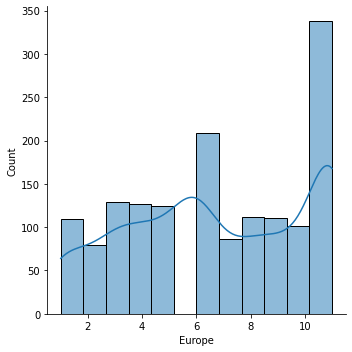

BoxPlot of:Europe
---------------------------------------------------------


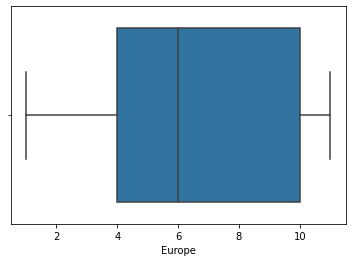

In [953]:
print('Fig. 10')
univariate_analysis_numeric('Europe')

Fig. 11
Description of:political.knowledge
---------------------------------------------------------
count    1525.000000
mean        1.542295
std         1.083315
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64
---------------------------------------------------------
Skewness of:political.knowledge -0.42683782344871657
---------------------------------------------------------
Distribution of:political.knowledge
---------------------------------------------------------


<Figure size 432x288 with 0 Axes>

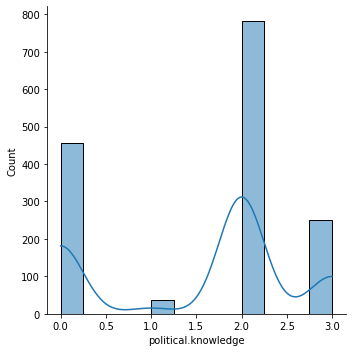

BoxPlot of:political.knowledge
---------------------------------------------------------


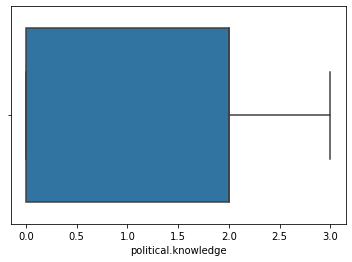

In [954]:
print('Fig. 11')
univariate_analysis_numeric('political.knowledge')

1. Minimum and maximum voting age is 24 and 93 years respectively. Mean voting age stands at 54 years.
2. Minimum and maximum assessment of current national economic conditions is 1 and 5 respectively. Average assessment stands at 3.
3. Minimum and maximum assessment of current household economic conditions is 1 and 5 respectively. Average assessment stands at 3.
4. Minimum and maximum assessment of the Labour leader Tony Blair is 1 and 5 respectively. Average assessment stands at 4.
5. Minimum and maximum assessment of the Conservative leader William Hague is 1 and 5 respectively. Average assessment stands at 2.
6. On an average, knowledge of parties positions on European integration is 2. Approximately 25% of parties do not hold positions on European integration with a maximum holding of 3.
7. 75% of the voters on a 11-point scale that measures respondents attitudes toward European integration represent high ‘Eurosceptic’ sentiment with a maximum scale of 11 and a minimum scale of 1.
8. We can also confirm the presence of outliers in 'economic.cond.national' and 'economic.cond.household'
9. The lower quartile and middle quartile values are same for political.knowledge that is 0. Hence, it doesnt have any lower and middle whisker.

## Bivariate Analysis and Multivariate Analysis

Fig. 12
Age versus Vote


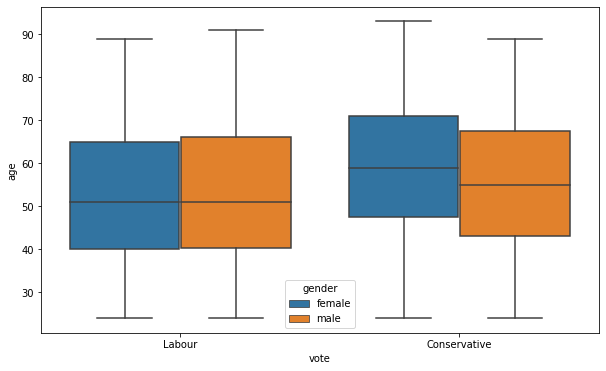

In [955]:
print('Fig. 12')
plt.figure(figsize=(10,6))
print('Age versus Vote')
sns.boxplot(y=df['age'], x=df['vote'], hue=df['gender']);

Fig. 13
Economic Condition Household versus Vote


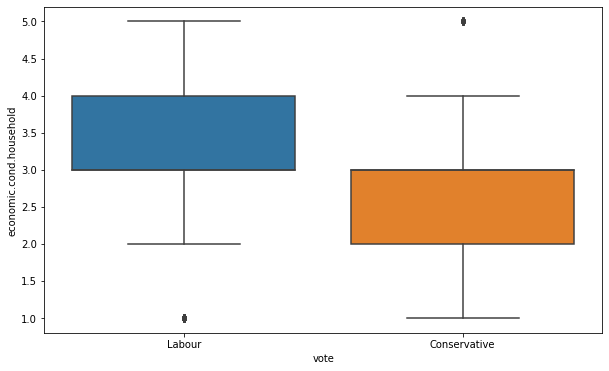

In [956]:
print('Fig. 13')
plt.figure(figsize=(10,6))
print('Economic Condition Household versus Vote')
sns.boxplot(y=df['economic.cond.household'], x=df['vote']);

Fig. 14
Economic Condition National versus Vote


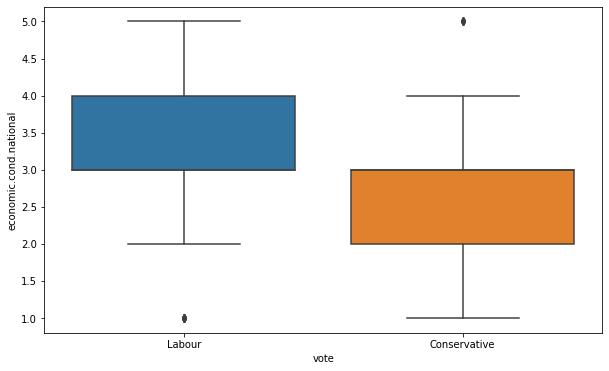

In [957]:
print('Fig. 14')
plt.figure(figsize=(10,6))
print('Economic Condition National versus Vote')
sns.boxplot(y=df['economic.cond.national'], x=df['vote']);

Fig. 15
Blair versus Vote


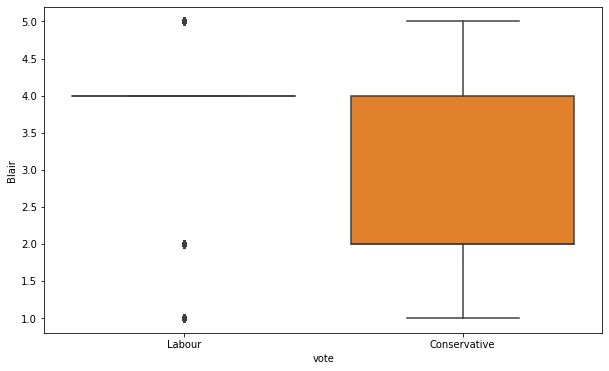

In [960]:
print('Fig. 15')
plt.figure(figsize=(10,6))
print('Blair versus Vote')
sns.boxplot(y=df['Blair'], x=df['vote']);

Fig. 16
Hague versus Vote


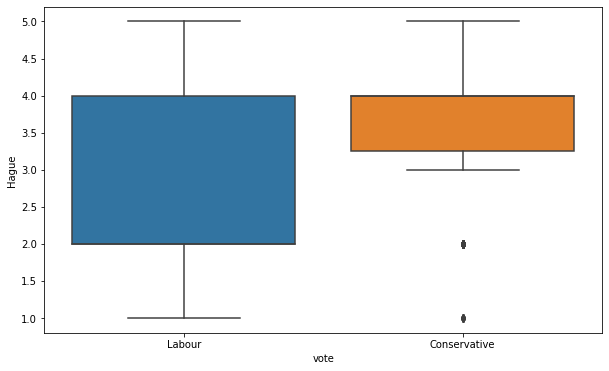

In [961]:
print('Fig. 16')
plt.figure(figsize=(10,6))
print('Hague versus Vote')
sns.boxplot(y=df['Hague'], x=df['vote']);

Fig. 17
Europe versus Vote


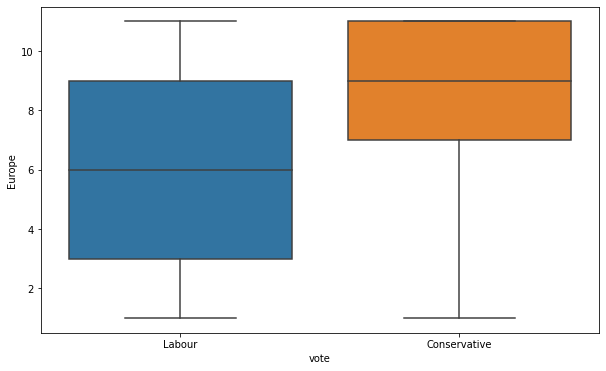

In [963]:
print('Fig. 17')
plt.figure(figsize=(10,6))
print('Europe versus Vote')
sns.boxplot(y=df['Europe'], x=df['vote']);

Fig. 18
Political Knowledge versus Vote


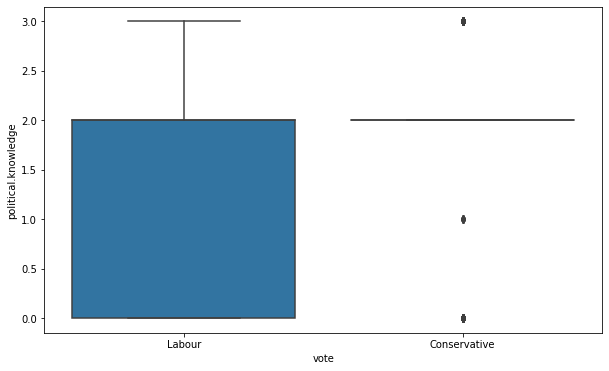

In [964]:
print('Fig. 18')
plt.figure(figsize=(10,6))
print('Political Knowledge versus Vote')
sns.boxplot(y=df['political.knowledge'], x=df['vote']);

1. People voting for Labour party has a median age of 51 for both male and female voters. On the other hand, people who vote for Conservative party has a median age of 59 years for females and 55 years for males.
2. There are no strong correlations between the independant variables. However, some variables show weak negative correlation.
3. 'Blair' and 'Hague' shows -0.24 correlation which is obvious that the people who are voting for one candidate is not voting for the other.
4. National economic condition has very weak correlation with household economic conditions.
5. Overall, the independant variables in the data set do not have high degree of correlation.

In [979]:
corr = df.drop('vote', axis=1)

Fig. 19
Heatmap of predictor variables


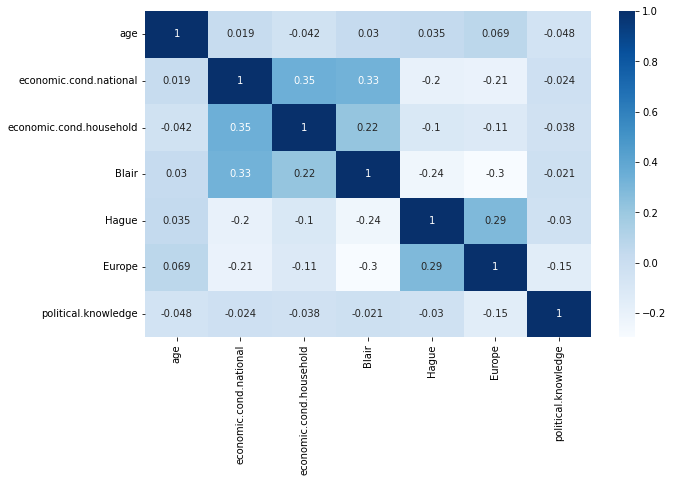

In [980]:
print('Fig. 19')
print('Heatmap of predictor variables')
plt.figure(figsize=(10,6))
sns.heatmap(data=corr.corr(), annot=True, cmap='Blues');

In [981]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [982]:
print('Lower Range in economic.cond.household is: ', remove_outlier(df['economic.cond.household'])[0])
print('Upper Range in economic.cond.household is: ', remove_outlier(df['economic.cond.household'])[1])
print('Lower Range in economic.cond.national is: ', remove_outlier(df['economic.cond.national'])[0])
print('Upper Range in economic.cond.national is: ', remove_outlier(df['economic.cond.national'])[1])

Lower Range in economic.cond.household is:  1.5
Upper Range in economic.cond.household is:  5.5
Lower Range in economic.cond.national is:  1.5
Upper Range in economic.cond.national is:  5.5


In [983]:
df_new = df.drop(['vote', 'gender'], axis=1)

In [984]:
for column in df_new.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

Fig. 20

BOXPLOT BEFORE OUTLIER TREATMENT


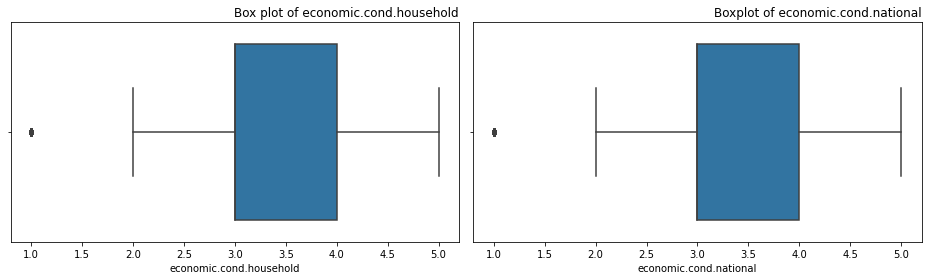

In [978]:
print('Fig. 20\n')
print('BOXPLOT BEFORE OUTLIER TREATMENT')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.boxplot(df['economic.cond.household'])
plt.title('Box plot of economic.cond.household', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(df['economic.cond.national'])
plt.title('Boxplot of economic.cond.national', loc='right')
plt.tight_layout()
plt.show()

Fig. 21

BOXPLOT AFTER OUTLIER TREATMENT


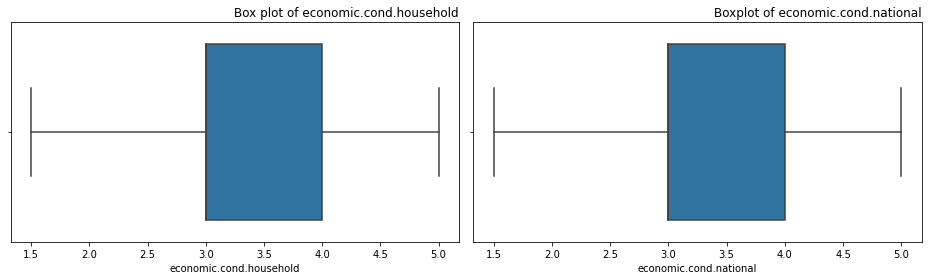

In [987]:
print('Fig. 21\n')
print('BOXPLOT AFTER OUTLIER TREATMENT')
plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
sns.boxplot(df['economic.cond.household'])
plt.title('Box plot of economic.cond.household', loc='right')
plt.subplot(1, 2, 2)
sns.boxplot(df['economic.cond.national'])
plt.title('Boxplot of economic.cond.national', loc='right')
plt.tight_layout()
plt.show()

Data Preparation: 4 marks
1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [986]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43.0,3.0,3.0,4.0,1.0,2.0,2.0,female
1,Labour,36.0,4.0,4.0,4.0,4.0,5.0,2.0,male
2,Labour,35.0,4.0,4.0,5.0,2.0,3.0,2.0,male
3,Labour,24.0,4.0,2.0,2.0,1.0,4.0,0.0,female
4,Labour,41.0,2.0,2.0,1.0,1.0,6.0,2.0,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67.0,5.0,3.0,2.0,4.0,11.0,3.0,male
1521,Conservative,73.0,2.0,2.0,4.0,4.0,8.0,2.0,male
1522,Labour,37.0,3.0,3.0,5.0,4.0,2.0,2.0,male
1523,Conservative,61.0,3.0,3.0,1.0,4.0,11.0,2.0,male


In [988]:
df_new = pd.get_dummies(df, drop_first=True)

In [990]:
print('Fig. 22\n')
df_new

Fig. 22



,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...
1520,67.0,5.0,3.0,2.0,4.0,11.0,3.0,0,1
1521,73.0,2.0,2.0,4.0,4.0,8.0,2.0,0,1
1522,37.0,3.0,3.0,5.0,4.0,2.0,2.0,1,1
1523,61.0,3.0,3.0,1.0,4.0,11.0,2.0,0,1


Scaling of the data is necessary for some machine learning algorithms to work so we will first scale the data.

In [991]:
X = df_new.drop('vote_Labour', axis=1)
y = df_new['vote_Labour']

In [995]:
Scale = StandardScaler()
print('Fig. 23')
X = pd.DataFrame(Scale.fit_transform(X), columns=X.columns)
X.head(5)

Fig. 23


,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [998]:
print('Fig. 23')
X.describe().T

Fig. 23


,count,mean,std,min,25%,50%,75%,max
age,1525.0,9.172990e-18,1.000328,-1.921698,-0.839313,-0.075276,0.816100,2.471512
economic.cond.national,1525.0,1.202681e-16,1.000328,-2.061826,-0.302622,-0.302622,0.870182,2.042985
economic.cond.household,1525.0,5.238433e-16,1.000328,-1.877568,-0.182644,-0.182644,0.947305,2.077254
Blair,1525.0,1.129879e-16,1.000328,-1.987695,-1.136225,0.566716,0.566716,1.418187
Hague,1525.0,-1.560864e-16,1.000328,-1.419886,-0.607076,-0.607076,1.018544,1.831354
Europe,1525.0,-2.824699e-16,1.000328,-1.737782,-0.827714,-0.221002,0.992422,1.295778
political.knowledge,1525.0,-6.504087e-16,1.000328,-1.424148,-1.424148,0.422643,0.422643,1.346038
gender_male,1525.0,2.213166e-16,1.000328,-0.937059,-0.937059,-0.937059,1.067169,1.067169


## Train-Test Split

In [1001]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [1079]:
print('The shape of the Train data set X:', X_train.shape)
print('The shape of the Train data set y:', y_train.shape)
print('The shape of the Test data set X:', X_test.shape)
print('The shape of the Test data set y:', y_test.shape)

The shape of the Train data set X: (1067, 8)
The shape of the Train data set y: (1067,)
The shape of the Test data set X: (458, 8)
The shape of the Test data set y: (458,)


1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

## Logistic Regression

In [1080]:
LR_model = LogisticRegression(penalty='l2', random_state=1, n_jobs=-1, verbose=True, max_iter=1000)
LR_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=1, verbose=True)

In [1081]:
y_test_pred = LR_model.predict(X_test)
y_train_pred = LR_model.predict(X_train)

In [1082]:
LR_model.score(X_test, y_test)

0.8209606986899564

In [1083]:
print('Fig. 24')
print(classification_report(y_train, y_train_pred))

Fig. 24
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1084]:
print('Fig. 25')
print(classification_report(y_test, y_test_pred))

Fig. 25
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



Fig. 26


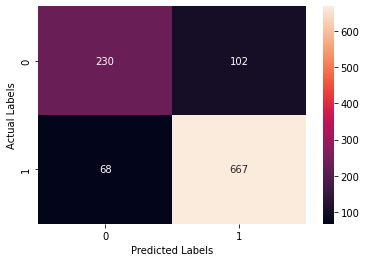

In [1085]:
print('Fig. 26')
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');

Fig. 27


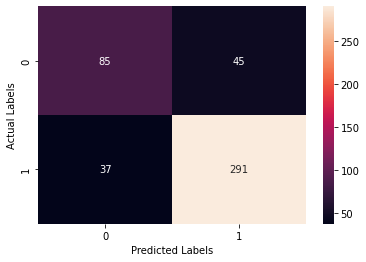

In [1086]:
print('Fig. 27')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');

Fig. 28
AUC: 0.890


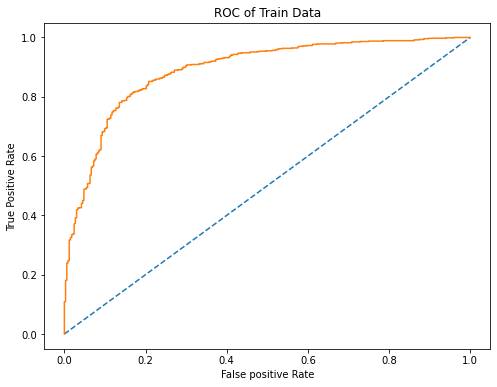

In [1087]:
print('Fig. 28')
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

Fig. 29
AUC: 0.883


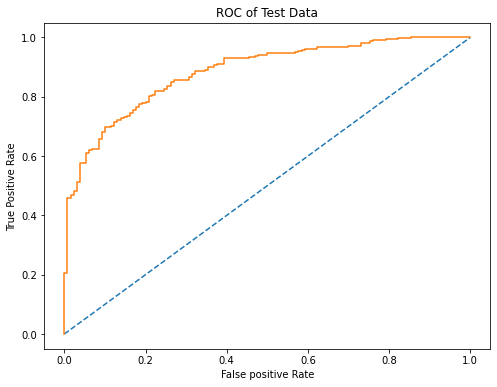

In [1088]:
print('Fig. 29')
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

## Model Tuning LR_model

In [1089]:
Grid_param = {'solver':['liblinear','newton-cg', 'sag', 'saga','lbfgs'],
             'penalty':['l1', 'l2', 'elasticnet'],
             'tol':[0.001, 0.0001, 0.00001]}

In [1093]:
Grid = GridSearchCV(estimator=LR_model, param_grid=Grid_param, scoring='accuracy', verbose=True, n_jobs=-1, cv=3)

In [1108]:
Grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                          random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'newton-cg', 'sag', 'saga',
                                    'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=True)

In [1109]:
Grid.best_estimator_

LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l1', random_state=1,
                   solver='saga', tol=1e-05, verbose=True)

In [1110]:
LR_modelReg = LogisticRegression(penalty='l1', max_iter=1000, n_jobs=-1, solver='saga', tol=0.00001, verbose=True)

In [1111]:
LR_modelReg.fit(X_train, y_train)

convergence after 22 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='l1', solver='saga',
                   tol=1e-05, verbose=True)

In [1112]:
LR_modelReg.coef_

array([[-0.3152431 ,  0.31294634,  0.14444763,  0.66235669, -1.0194748 ,
        -0.77419391, -0.5051148 ,  0.14082239]])

In [1113]:
y_train_pred = LR_modelReg.predict(X_train)
y_test_pred = LR_modelReg.predict(X_test)

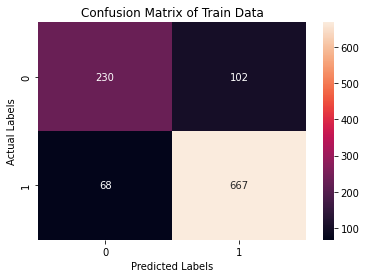

In [1114]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Train Data');

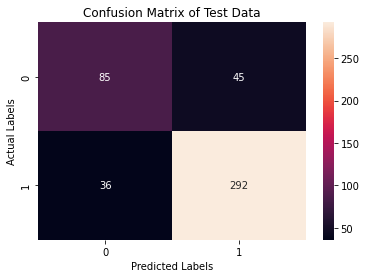

In [1115]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

In [1116]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1117]:
LR_modelReg.score(X_train, y_train)

0.8406747891283973

In [1118]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1119]:
LR_modelReg.score(X_test, y_test)

0.8231441048034934

Fig. 35
AUC: 0.890


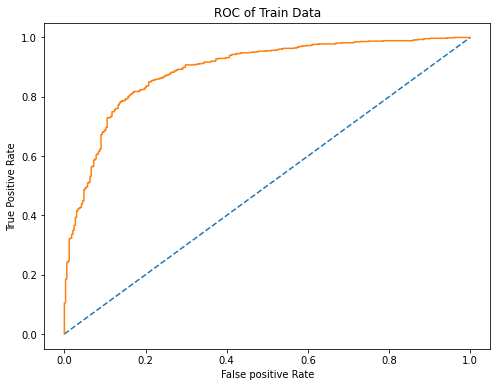

In [1120]:
# predict probabilities
print('Fig. 35')
probs = LR_modelReg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

Fig. 35
AUC: 0.883


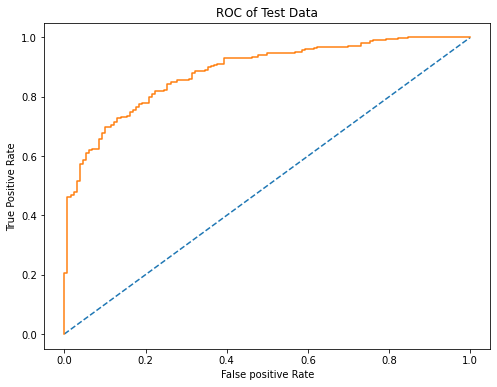

In [1121]:
# predict probabilities
print('Fig. 35')
probs = LR_modelReg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

## LDA

In [1016]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [1017]:
y_test_pred = LDA_model.predict(X_test)
y_train_pred = LDA_model.predict(X_train)

In [1018]:
print('Fig. 30')
print(classification_report(y_train, y_train_pred))

Fig. 30
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1019]:
LDA_model.score(X_train, y_train)

0.8397375820056232

In [1020]:
LDA_model.score(X_test, y_test)

0.8187772925764192

In [1022]:
print('Fig. 31')
print(classification_report(y_test, y_test_pred))

Fig. 31
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



Fig. 31


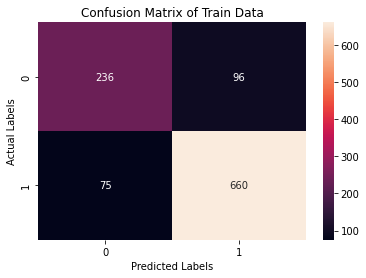

In [1024]:
print('Fig. 31')
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Train Data');

Fig. 32


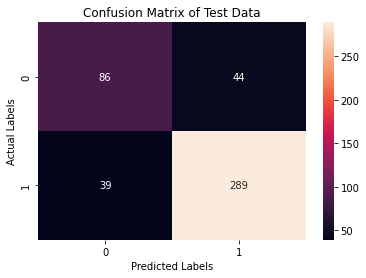

In [1025]:
print('Fig. 32')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

Fig. 33
AUC: 0.889


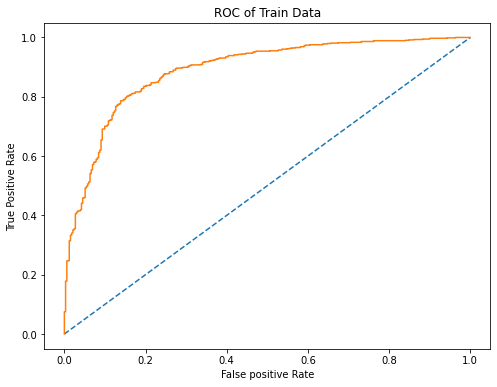

In [1027]:

print('Fig. 33')
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

Fig. 34
AUC: 0.884


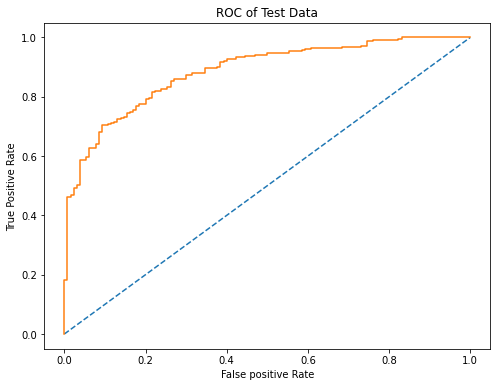

In [1029]:
print('Fig. 34')
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

## KNN

In [1259]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [1260]:
KNN_model.score(X_test, y_test)

0.8187772925764192

In [1261]:
y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

In [1262]:
print('Fig. 35')
print(classification_report(y_train, y_train_pred))

Fig. 35
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



In [1263]:
print('Fig. 36')
print(classification_report(y_test, y_test_pred))

Fig. 36
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Fig. 37


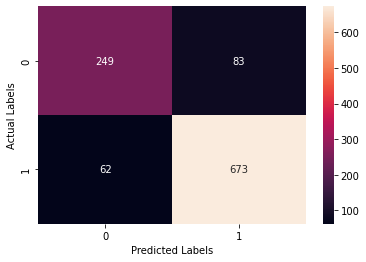

In [1264]:
print('Fig. 37')
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');

Fig. 38


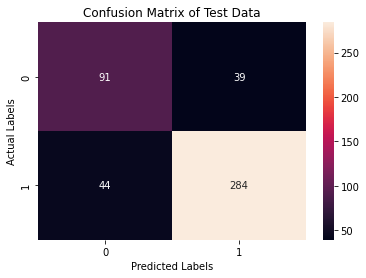

In [1265]:
print('Fig. 38')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

In [1266]:
KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [1267]:
y_test_pred = KNN_model.predict(X_test)
y_train_pred = KNN_model.predict(X_train)

In [1268]:
print('Fig. 39')
print(classification_report(y_train, y_train_pred))

Fig. 39
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



In [1269]:
print('Fig. 40')
print(classification_report(y_test, y_test_pred))

Fig. 40
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



Fig. 41


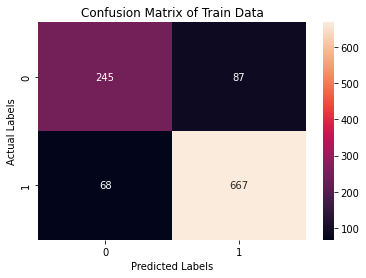

In [1270]:
print('Fig. 41')
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');

Fig. 42


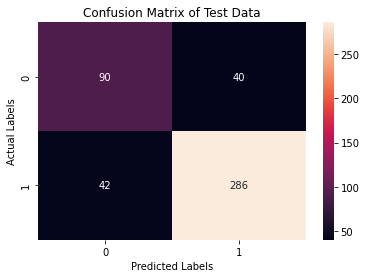

In [1271]:
print('Fig. 42')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

Fig. 43
AUC: 0.919


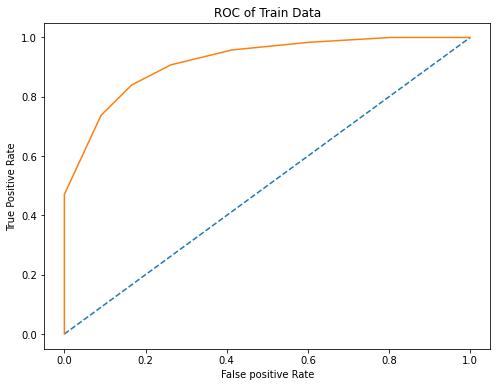

In [1273]:
print('Fig. 43')
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

Fig. 44
AUC: 0.881


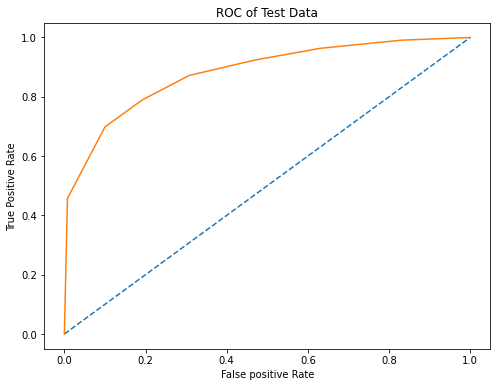

In [1274]:
print('Fig. 44')
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

In [1051]:
score = []
for k in range(1,20,2):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train, y_train)
    score.append(KNN_model.score(X_test,y_test))
MCE = [1-x for x in score]
MCE

[0.22707423580786024,
 0.1899563318777293,
 0.18122270742358082,
 0.17903930131004364,
 0.1834061135371179,
 0.1834061135371179,
 0.17685589519650657,
 0.17903930131004364,
 0.16593886462882101,
 0.17030567685589515]

In [1052]:
score

[0.7729257641921398,
 0.8100436681222707,
 0.8187772925764192,
 0.8209606986899564,
 0.8165938864628821,
 0.8165938864628821,
 0.8231441048034934,
 0.8209606986899564,
 0.834061135371179,
 0.8296943231441049]

Fig. 45


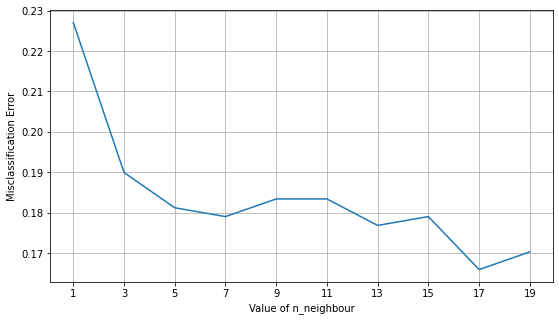

In [1056]:
print('Fig. 45')
plt.figure(figsize=(9,5))
plt.plot(range(1,20,2), MCE)
plt.xticks(range(1,20,2))
plt.ylabel('Misclassification Error')
plt.xlabel('Value of n_neighbour')
plt.grid();

## Naive Bayes

In [1065]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [1066]:
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [1069]:
print('Fig. 46')
print(classification_report(y_train, y_train_pred))

Fig. 46
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.80      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [1068]:
print('Fig. 47')
print(classification_report(y_test, y_test_pred))

Fig. 47
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.82      0.82       458



In [1071]:
NB_model.score(X_train, y_train)

0.8322399250234301

In [1072]:
NB_model.score(X_test, y_test)

0.8231441048034934

Fig. 48


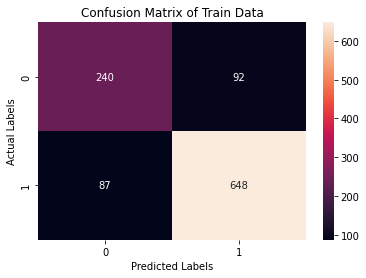

In [1074]:
print('Fig. 48')
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');


Fig. 49


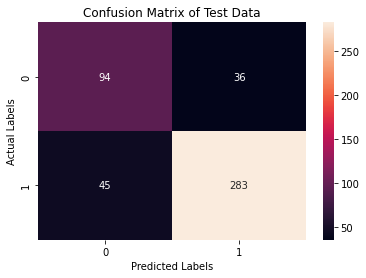

In [1075]:
print('Fig. 49')
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

Fig. 50
AUC: 0.887


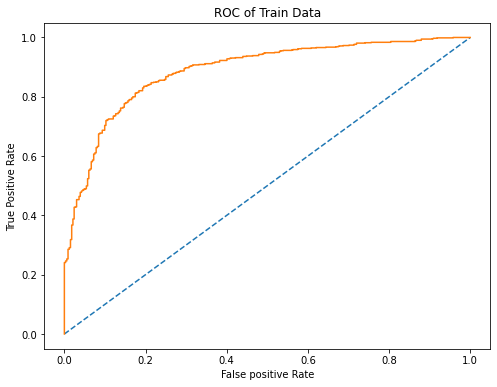

In [1076]:
print('Fig. 50')
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

Fig. 51
AUC: 0.885


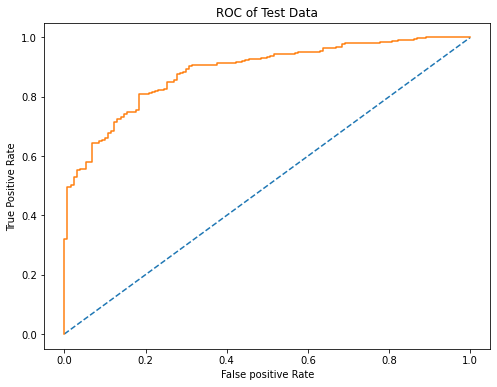

In [1078]:
print('Fig. 51')
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

## Bagging

In [1276]:
from sklearn.ensemble import RandomForestClassifier

In [1277]:
RF_model = RandomForestClassifier(n_estimators=101, random_state=1, criterion='gini')

In [1278]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=101, random_state=1)

In [1279]:
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

In [1280]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [1281]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



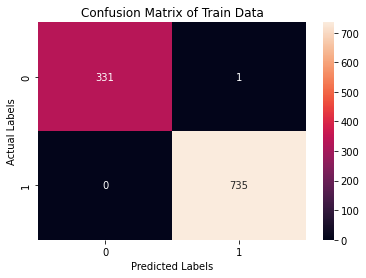

In [1282]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');

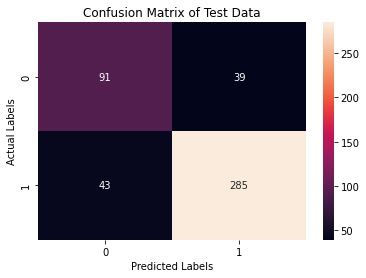

In [1283]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

In [1284]:
RF_model.score(X_train, y_train)

0.9990627928772259

In [1285]:
RF_model.score(X_test, y_test)

0.8209606986899564

In [1286]:
RF_model.feature_importances_

array([0.20787047, 0.08099118, 0.07542912, 0.12474838, 0.18380214,
       0.20522545, 0.09109358, 0.03083968])

AUC: 1.000


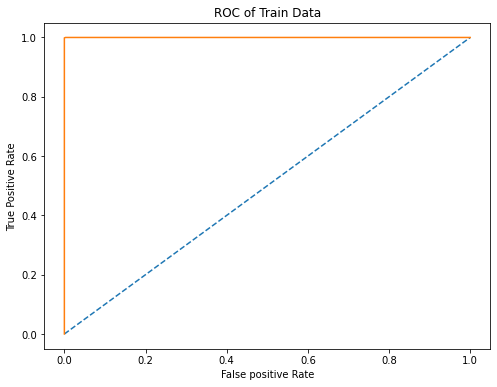

In [1287]:
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.887


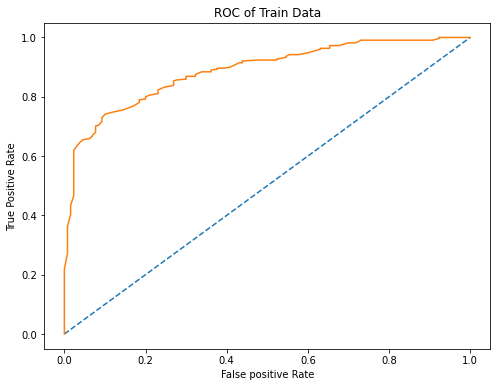

In [1288]:
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(test_fpr, test_tpr);

In [1289]:
param = {'max_depth': [5, 6, 7],
         'min_samples_split': [5, 10, 15],
         'min_samples_leaf': [1, 5, 10, 15],
         'max_features': [4, 5, 6]}

Grid = GridSearchCV(estimator=RF_model, param_grid=param, verbose=True, cv=3, n_jobs=-1)

In [1290]:
Grid.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=101, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'min_samples_split': [5, 10, 15]},
             verbose=True)

In [1291]:
Grid.best_estimator_

RandomForestClassifier(max_depth=6, max_features=4, min_samples_split=15,
                       n_estimators=101, random_state=1)

In [1292]:
RF_reg = RandomForestClassifier(n_estimators=101, random_state=1, max_depth=6, max_features=4, min_samples_split=15, n_jobs=-1, verbose=True)

In [1293]:
RF_reg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=6, max_features=4, min_samples_split=15,
                       n_estimators=101, n_jobs=-1, random_state=1,
                       verbose=True)

In [1294]:
y_pred = RF_reg.predict(X_test)
y_trainpred = RF_reg.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 101 out of 101 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 101 out of 101 | elapsed:    0.0s finished


In [1295]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [1296]:
print(classification_report(y_train, y_trainpred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.88      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.88      0.88      0.88      1067



[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 101 out of 101 | elapsed:    0.0s finished


AUC: 0.942


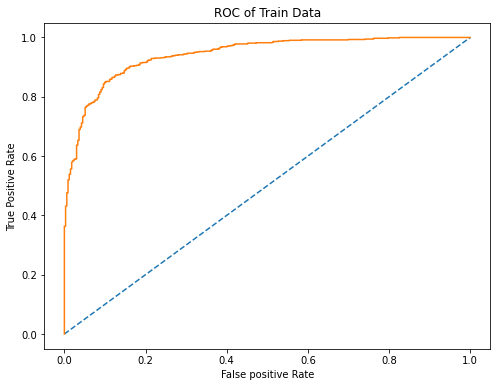

In [1298]:
probs = RF_reg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 101 out of 101 | elapsed:    0.0s finished


AUC: 0.899


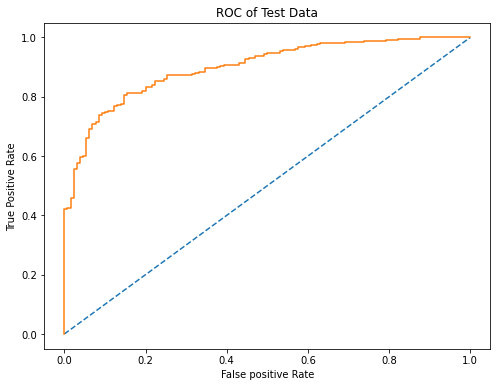

In [1302]:
probs = RF_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(train_fpr, train_tpr);

## Boosting

In [1168]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1169]:
AdaBoost_model = AdaBoostClassifier(random_state=1)
AdaBoost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [1170]:
y_test_pred = AdaBoost_model.predict(X_test)
y_train_pred = AdaBoost_model.predict(X_train)

In [1171]:
AdaBoost_model.score(X_train, y_train)

0.8425492033739457

In [1172]:
AdaBoost_model.score(X_test, y_test)

0.8231441048034934

In [1173]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [1174]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



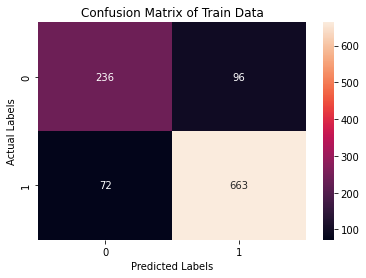

In [1176]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');

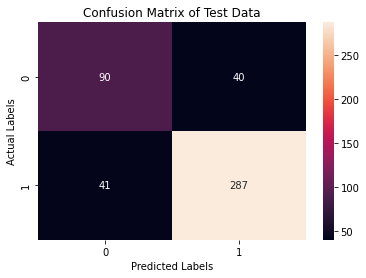

In [1177]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

AUC: 0.910


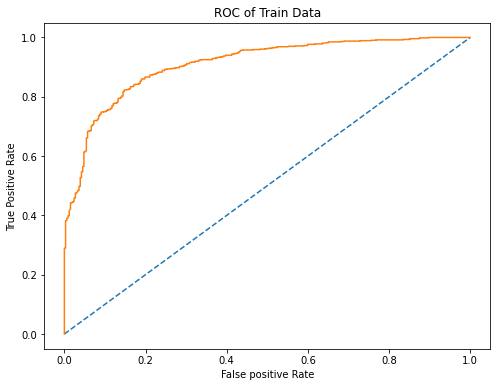

In [1178]:
probs = AdaBoost_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.880


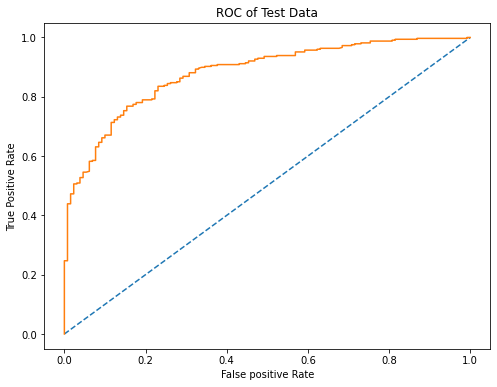

In [1179]:
probs = AdaBoost_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

In [1208]:
GBC = GradientBoostingClassifier(init=AdaBoost_model, random_state=1)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [1212]:
y_train_pred = GBC.predict(X_train)
y_test_pred = GBC.predict(X_test)

In [1213]:
GBC.score(X_train, y_train)

0.8828491096532334

In [1214]:
GBC.score(X_test, y_test)

0.8253275109170306

In [1215]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       332
           1       0.90      0.93      0.92       735

    accuracy                           0.88      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.88      0.88      1067



In [1207]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



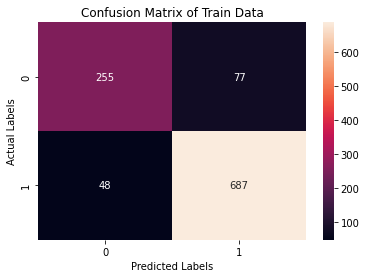

In [1216]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');

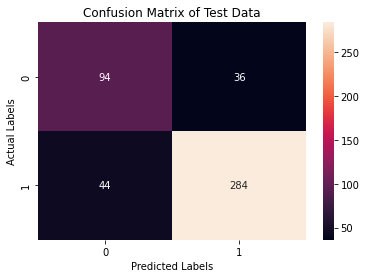

In [1217]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

AUC: 0.949


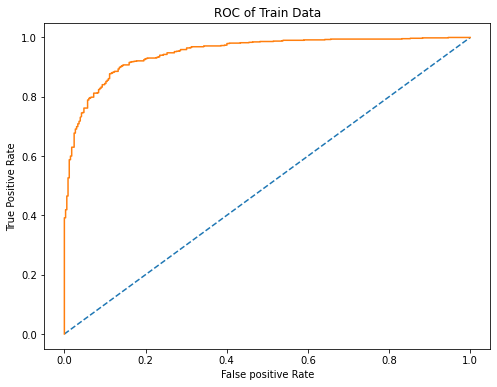

In [1218]:
probs = GBC.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.903


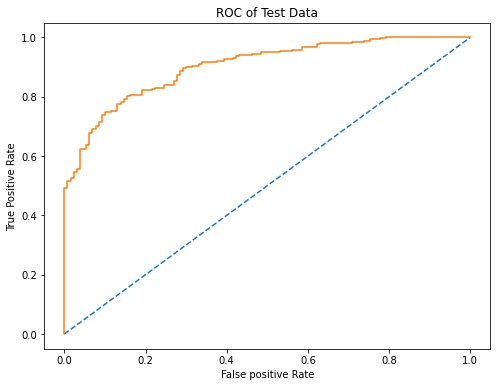

In [1220]:
probs = GBC.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

In [1246]:
XGB = XGBClassifier(n_estimators=101,learning_rate= 0.001)
XGB.fit(X_train, y_train)

[18:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=101, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1247]:
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

In [1248]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       332
           1       0.91      0.91      0.91       735

    accuracy                           0.87      1067
   macro avg       0.85      0.85      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [1250]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.72      0.67       130
           1       0.88      0.83      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458



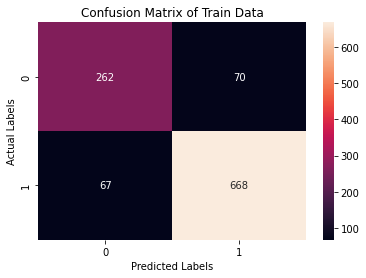

In [1252]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels');
plt.title('Confusion Matrix of Train Data');

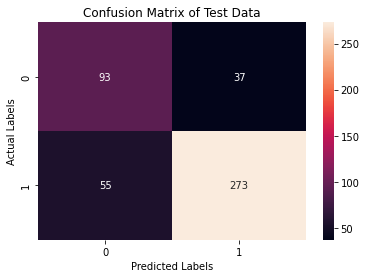

In [1254]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix of Test Data');

AUC: 0.911


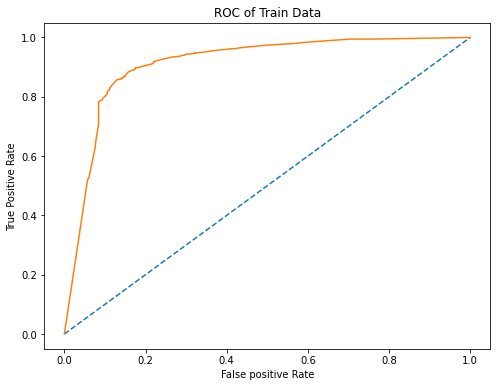

In [1256]:
probs = XGB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Train Data')
plt.plot(train_fpr, train_tpr);

AUC: 0.857


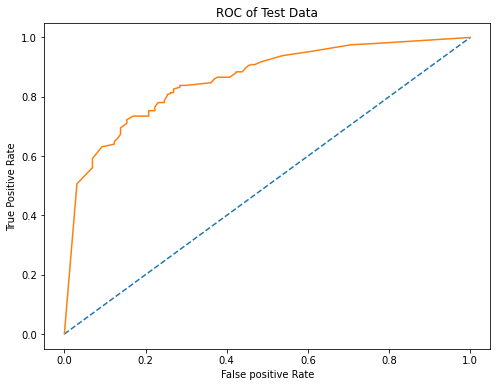

In [1258]:
probs = XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.ylabel('True Positive Rate')
plt.xlabel('False positive Rate')
plt.title('ROC of Test Data')
plt.plot(test_fpr, test_tpr);

In [ ]:
performance = pd.DataFrame()

Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [1305]:
import nltk
import re
import string

In [1306]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\tirth\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [1307]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [1308]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [1309]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [1310]:
df_roosevelt = inaugural.raw('1941-Roosevelt.txt')
df_kennedy = inaugural.raw('1961-Kennedy.txt')
df_nixon = inaugural.raw('1973-Nixon.txt')

In [1311]:
type(df_roosevelt)

str

In [1312]:
split_df_roosevelt = df_roosevelt.split('\n\n')
split_df_kennedy = df_kennedy.split('\n\n')
split_df_nixon = df_nixon.split('\n\n')

In [1313]:
type(split_df_roosevelt)

list

In [1314]:
split_df_roosevelt

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 "In Washington's day the task of the people was to create and weld together a nation.",
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within.",
 'In this day the task of the people is to save that Nation and its institutions from disruption from without.',
 'To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.',
 'Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.',
 'There are men who doubt this. There are men who believe that d

In [1315]:
df_text_roosevelt = pd.DataFrame(split_df_roosevelt)

In [1316]:
df_text_roosevelt.columns = ['speech']

In [1317]:
df_text_roosevelt.head(10)

,speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."
5,Lives of nations are determined not by the cou...
6,There are men who doubt this. There are men wh...
7,But we Americans know that this is not true.
8,"Eight years ago, when the life of this Republi..."
9,These later years have been living years -- fr...


In [1318]:
df_text_roosevelt.shape

(38, 1)

## No. of words

In [1319]:
df_text_roosevelt['word_count'] = df_text_roosevelt['speech'].apply(lambda x: len(str(x).split()))

In [1320]:
df_text_roosevelt.head(10)

,speech,word_count
0,On each national day of inauguration since 178...,20
1,In Washington's day the task of the people was...,16
2,In Lincoln's day the task of the people was to...,17
3,In this day the task of the people is to save ...,20
4,"To us there has come a time, in the midst of s...",53
5,Lives of nations are determined not by the cou...,51
6,There are men who doubt this. There are men wh...,59
7,But we Americans know that this is not true.,9
8,"Eight years ago, when the life of this Republi...",38
9,These later years have been living years -- fr...,42


In [1321]:
all_words_roosevelt = inaugural.words('1941-Roosevelt.txt')
print('The length of all words in 1941-Roosevelt.txt is', len(all_words_roosevelt))

The length of all words in 1941-Roosevelt.txt is 1536


In [1322]:
df_text_roosevelt.shape
print('No. of rows in DataFrame 1941_Roosevelt is', df_text_roosevelt.shape[0])
print('No. of columns in DataFrame 1941_Roosevelt is', df_text_roosevelt.shape[1])

No. of rows in DataFrame 1941_Roosevelt is 38
No. of columns in DataFrame 1941_Roosevelt is 2


## No. of Characters

In [1324]:
df_text_roosevelt['char_count'] = df_text_roosevelt['speech'].str.len()

In [1329]:
print('Sum of all characters present in the President Roosevelt speech is', df_text_roosevelt['char_count'].sum())

Sum of all characters present in the President Roosevelt speech is 7497


## No. of Sentences

In [1330]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [1331]:
print('Length of all sentences in 1941-Roosevelt.txt is', len(inaugural.sents('1941-Roosevelt.txt')))

Length of all sentences in 1941-Roosevelt.txt is 68


In [1332]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words))

In [1333]:
df_text_roosevelt['avg_word'] = df_text_roosevelt['speech'].apply(lambda x: avg_word(x))

In [1334]:
df_text_roosevelt[['speech','avg_word']].head(10)

,speech,avg_word
0,On each national day of inauguration since 178...,5.050000
1,In Washington's day the task of the people was...,4.312500
2,In Lincoln's day the task of the people was to...,4.705882
3,In this day the task of the people is to save ...,4.450000
4,"To us there has come a time, in the midst of s...",3.698113
5,Lives of nations are determined not by the cou...,3.921569
6,There are men who doubt this. There are men wh...,4.406780
7,But we Americans know that this is not true.,4.000000
8,"Eight years ago, when the life of this Republi...",4.368421
9,These later years have been living years -- fr...,4.785714


## Kennedy

In [1335]:
df_text_kennedy = df_kennedy.split('\n\n')

In [1336]:
df_text_kennedy = pd.DataFrame(df_text_kennedy)

In [1337]:
df_text_kennedy.columns = ['speech']

In [1338]:
df_text_kennedy.head(10)

,speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,The world is very different now. For man holds...
2,We dare not forget today that we are the heirs...
3,"Let every nation know, whether it wishes us we..."
4,This much we pledge -- and more.
5,To those old allies whose cultural and spiritu...
6,To those new States whom we welcome to the ran...
7,To those peoples in the huts and villages acro...
8,"To our sister republics south of our border, w..."
9,"To that world assembly of sovereign states, th..."


In [1339]:
df_text_kennedy.shape
print('No. of rows in DataFrame 1961-Kennedy.txt is', df_text_kennedy.shape[0])
print('No. of columns in DataFrame 1961-Kennedy.txt is', df_text_kennedy.shape[1])

No. of rows in DataFrame 1961-Kennedy.txt is 27
No. of columns in DataFrame 1961-Kennedy.txt is 1


## No. of Words

In [1340]:
df_text_kennedy['word_count'] = df_text_kennedy['speech'].apply(lambda x: len(str(x).split()))

In [1341]:
df_text_kennedy.head(10)

,speech,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",73
1,The world is very different now. For man holds...,68
2,We dare not forget today that we are the heirs...,96
3,"Let every nation know, whether it wishes us we...",40
4,This much we pledge -- and more.,7
5,To those old allies whose cultural and spiritu...,52
6,To those new States whom we welcome to the ran...,85
7,To those peoples in the huts and villages acro...,73
8,"To our sister republics south of our border, w...",95
9,"To that world assembly of sovereign states, th...",67


In [1342]:
all_words_kennedy = inaugural.words('1961-Kennedy.txt')
print('The length of all words in 1961-Kennedy.txt is', len(all_words_kennedy))

The length of all words in 1961-Kennedy.txt is 1546


In [760]:
df_text_kennedy.shape
print('No. of rows in DataFrame 1961-Kennedy.txt is', df_text_kennedy.shape[0])
print('No. of columns in DataFrame 1961-Kennedy.txt is', df_text_kennedy.shape[1])

No. of rows in DataFrame 1961-Kennedy.txt is 27
No. of columns in DataFrame 1961-Kennedy.txt is 2


## No. of Characters

In [1347]:
df_text_kennedy['char_count'] = df_text_kennedy['speech'].str.len()

In [1348]:
df_text_kennedy[['speech','char_count']].head(10)

,speech,char_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32
5,To those old allies whose cultural and spiritu...,288
6,To those new States whom we welcome to the ran...,448
7,To those peoples in the huts and villages acro...,388
8,"To our sister republics south of our border, w...",525
9,"To that world assembly of sovereign states, th...",360


In [1349]:
print('Sum of all characters present in the President Roosevelt speech is', df_text_kennedy['char_count'].sum())

Sum of all characters present in the President Roosevelt speech is 7566


## Sentences

In [1350]:
print('Length of all sentences in 1961-Kennedy.txt is', len(inaugural.sents('1961-Kennedy.txt')))

Length of all sentences in 1961-Kennedy.txt is 52


In [1351]:
df_text_kennedy['avg_word'] = df_text_kennedy['speech'].apply(lambda x: avg_word(x))

In [1352]:
df_text_kennedy[['speech','avg_word']].head(10)

,speech,avg_word
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5.109589
1,The world is very different now. For man holds...,4.235294
2,We dare not forget today that we are the heirs...,4.343750
3,"Let every nation know, whether it wishes us we...",4.450000
4,This much we pledge -- and more.,3.714286
5,To those old allies whose cultural and spiritu...,4.557692
6,To those new States whom we welcome to the ran...,4.282353
7,To those peoples in the huts and villages acro...,4.328767
8,"To our sister republics south of our border, w...",4.536842
9,"To that world assembly of sovereign states, th...",4.388060


## Nixon

In [1365]:
df_text_nixon = df_nixon.split('\n\n')
df_text_nixon = pd.DataFrame(df_text_nixon)

In [1366]:
df_text_nixon.columns = ['speech']
df_text_nixon.head(10)

,speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"When we met here four years ago, America was b..."
2,"As we meet here today, we stand on the thresho..."
3,The central question before us is: How shall w...
4,Let us resolve that this will be what it can b...
5,This past year saw far-reaching results from o...
6,The peace we seek in the world is not the flim...
7,It is important that we understand both the ne...
8,Unless we in America work to preserve the peac...
9,"Unless we in America work to preserve freedom,..."


In [1367]:
df_text_nixon.shape
print('No. of rows in DataFrame 1973-Nixon.txt is', df_text_nixon.shape[0])
print('No. of columns in DataFrame 1973-Nixon.txt is', df_text_nixon.shape[1])

No. of rows in DataFrame 1973-Nixon.txt is 51
No. of columns in DataFrame 1973-Nixon.txt is 1


## No. of words

In [1368]:
df_text_nixon['word_count'] = df_text_nixon['speech'].apply(lambda x: len(str(x).split()))
df_text_nixon.head(10)

,speech,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",25
1,"When we met here four years ago, America was b...",27
2,"As we meet here today, we stand on the thresho...",19
3,The central question before us is: How shall w...,51
4,Let us resolve that this will be what it can b...,38
5,This past year saw far-reaching results from o...,81
6,The peace we seek in the world is not the flim...,29
7,It is important that we understand both the ne...,19
8,Unless we in America work to preserve the peac...,14
9,"Unless we in America work to preserve freedom,...",13


In [1369]:
all_words_nixon = inaugural.words('1973-Nixon.txt')
print('The length of all words in 1973-Nixon.tx is', len(all_words_nixon))

The length of all words in 1973-Nixon.tx is 2028


In [1370]:
df_text_nixon.shape
print('No. of rows in DataFrame 1973-Nixon.txt is', df_text_nixon.shape[0])
print('No. of columns in DataFrame 1973-Nixon.txt is', df_text_nixon.shape[1])

No. of rows in DataFrame 1973-Nixon.txt is 51
No. of columns in DataFrame 1973-Nixon.txt is 2


## Character counts

In [1371]:
df_text_nixon['char_count'] = df_text_nixon['speech'].str.len()

In [1372]:
df_text_nixon[['speech','char_count']].head(10)

,speech,char_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",155
1,"When we met here four years ago, America was b...",156
2,"As we meet here today, we stand on the thresho...",84
3,The central question before us is: How shall w...,269
4,Let us resolve that this will be what it can b...,199
5,This past year saw far-reaching results from o...,465
6,The peace we seek in the world is not the flim...,151
7,It is important that we understand both the ne...,118
8,Unless we in America work to preserve the peac...,72
9,"Unless we in America work to preserve freedom,...",72


In [1373]:
print('Sum of all characters present in the President Roosevelt speech is', df_text_nixon['char_count'].sum())

Sum of all characters present in the President Roosevelt speech is 9891


## Sentences

In [1374]:
print('Length of all sentences in 1973-Nixon.txt is', len(inaugural.sents('1973-Nixon.txt')))

Length of all sentences in 1973-Nixon.txt is 69


In [1375]:
df_text_nixon['avg_word'] = df_text_nixon['speech'].apply(lambda x: avg_word(x))

In [1376]:
df_text_nixon[['speech','avg_word']].head(10)

,speech,avg_word
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",5.240000
1,"When we met here four years ago, America was b...",4.814815
2,"As we meet here today, we stand on the thresho...",3.473684
3,The central question before us is: How shall w...,4.294118
4,Let us resolve that this will be what it can b...,4.263158
5,This past year saw far-reaching results from o...,4.753086
6,The peace we seek in the world is not the flim...,4.241379
7,It is important that we understand both the ne...,5.263158
8,Unless we in America work to preserve the peac...,4.214286
9,"Unless we in America work to preserve freedom,...",4.615385


In [1377]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tirth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Remove punctuations

In [1378]:
df_text_roosevelt['speech'] = df_text_roosevelt['speech'].str.replace('[^\w\s]','')
df_text_kennedy['speech'] = df_text_kennedy['speech'].str.replace('[^\w\s]','')
df_text_nixon['speech'] = df_text_nixon['speech'].str.replace('[^\w\s]','')

In [1379]:
from nltk.corpus import stopwords
stop = nltk.corpus.stopwords.words('english')
df_text_roosevelt['stopwords'] = df_text_roosevelt['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_text_roosevelt.head(10)

,speech,word_count,char_count,avg_word,stopwords
0,On each national day of inauguration since 178...,20,120,5.050000,8
1,In Washingtons day the task of the people was ...,16,84,4.312500,7
2,In Lincolns day the task of the people was to ...,17,96,4.705882,8
3,In this day the task of the people is to save ...,20,108,4.450000,11
4,To us there has come a time in the midst of sw...,53,248,3.698113,31
5,Lives of nations are determined not by the cou...,51,250,3.921569,28
6,There are men who doubt this There are men who...,59,318,4.406780,30
7,But we Americans know that this is not true,9,44,4.000000,5
8,Eight years ago when the life of this Republic...,38,203,4.368421,17
9,These later years have been living years frui...,42,242,4.785714,18


In [1380]:
df_text_kennedy['stopwords'] = df_text_kennedy['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_text_kennedy.head(10)

,speech,word_count,char_count,avg_word,stopwords
0,Vice President Johnson Mr Speaker Mr Chief Jus...,73,445,5.109589,22
1,The world is very different now For man holds ...,68,355,4.235294,33
2,We dare not forget today that we are the heirs...,96,512,4.343750,47
3,Let every nation know whether it wishes us wel...,40,217,4.450000,15
4,This much we pledge and more,7,32,3.714286,3
5,To those old allies whose cultural and spiritu...,52,288,4.557692,24
6,To those new States whom we welcome to the ran...,85,448,4.282353,39
7,To those peoples in the huts and villages acro...,73,388,4.328767,38
8,To our sister republics south of our border we...,95,525,4.536842,39
9,To that world assembly of sovereign states the...,67,360,4.388060,31


In [1381]:
df_text_nixon['stopwords'] = df_text_nixon['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_text_nixon.head(10)

,speech,word_count,char_count,avg_word,stopwords
0,Mr Vice President Mr Speaker Mr Chief Justice ...,25,155,5.240000,6
1,When we met here four years ago America was bl...,27,156,4.814815,10
2,As we meet here today we stand on the threshol...,19,84,3.473684,10
3,The central question before us is How shall we...,51,269,4.294118,25
4,Let us resolve that this will be what it can b...,38,199,4.263158,21
5,This past year saw farreaching results from ou...,81,465,4.753086,35
6,The peace we seek in the world is not the flim...,29,151,4.241379,16
7,It is important that we understand both the ne...,19,118,5.263158,10
8,Unless we in America work to preserve the peac...,14,72,4.214286,8
9,Unless we in America work to preserve freedom ...,13,72,4.615385,7


## Upper case to lower case conversion

In [1382]:
df_text_roosevelt['speech'] = df_text_roosevelt['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_text_kennedy['speech'] = df_text_kennedy['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_text_nixon['speech'] = df_text_nixon['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## 2.2 Remove all the stopwords from all three speeches. – 3 Marks

In [1383]:
stopwords = nltk.corpus.stopwords.words('english')
df_text_roosevelt['speech'] = df_text_roosevelt['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_text_kennedy['speech'] = df_text_kennedy['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_text_nixon['speech'] = df_text_nixon['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [1385]:
clean_words_roosevelt = [x for x in pd.Series(' '.join(df_text_roosevelt['speech']).split())]
clean_words_kennedy = [x for x in pd.Series(' '.join(df_text_kennedy['speech']).split())]
clean_words_nixon = [x for x in pd.Series(' '.join(df_text_nixon['speech']).split())]

In [1389]:
clean_words_roosevelt[:]

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washingtons',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincolns',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'threescore',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplained

## Top 3 words

In [852]:
nltk.FreqDist(clean_words_roosevelt).most_common(10)

[('nation', 11),
 ('know', 10),
 ('spirit', 9),
 ('democracy', 9),
 ('us', 8),
 ('life', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

In [851]:
nltk.FreqDist(clean_words_kennedy).most_common(10)

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

In [854]:
nltk.FreqDist(clean_words_nixon).most_common(10)

[('us', 26),
 ('let', 22),
 ('peace', 19),
 ('world', 16),
 ('new', 15),
 ('america', 13),
 ('responsibility', 11),
 ('government', 10),
 ('great', 9),
 ('home', 9)]

## Common word Removal

In [858]:
freq1 = pd.Series(' '.join(df_text_roosevelt['speech']).split()).value_counts()[:10]
freq1

nation       11
know         10
democracy     9
spirit        9
life          8
us            8
people        7
america       7
years         6
freedom       6
dtype: int64

In [869]:
freq2 = pd.Series(' '.join(df_text_kennedy['speech']).split()).value_counts()[:10]
freq2

let         16
us          12
sides        8
world        8
pledge       7
new          7
ask          5
citizens     5
nations      5
free         5
dtype: int64

In [862]:
freq3 = pd.Series(' '.join(df_text_nixon['speech']).split()).value_counts()[:10]
freq3

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
dtype: int64

word 'let' doesn't seem to be very important for an inagural speech. Hence we will remove this word.

## word cloud

In [890]:
stopwords.extend(['let'])

In [891]:
roosevelt_corpus = df_text_roosevelt['speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stopwords])) 
kennedy_corpus = df_text_kennedy['speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stopwords]))
nixon_corpus = df_text_nixon['speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stopwords]))

In [892]:
WC_Roosevelt = ' '.join(roosevelt_corpus)
WC_Kennedy = ' '.join(kennedy_corpus)
WC_Nixon = ' '.join(nixon_corpus)

In [893]:
WC_Kennedy

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival success li

In [894]:
from wordcloud import WordCloud

In [895]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(WC_Roosevelt)

Word Cloud for President Franklin D. Roosevelt's Speech


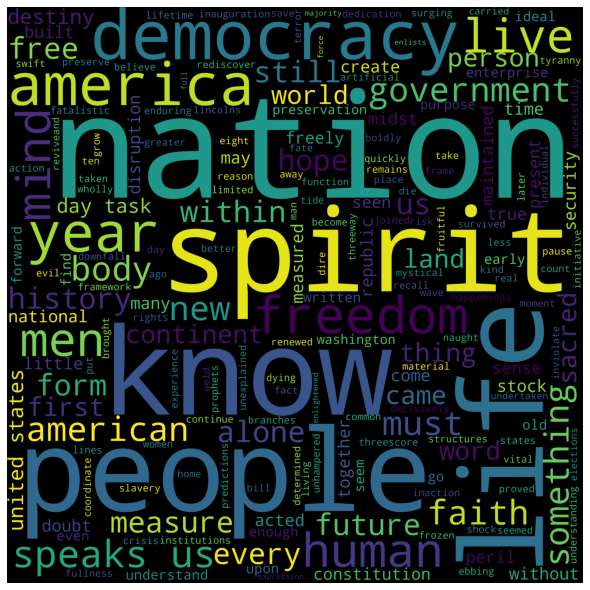

In [896]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Franklin D. Roosevelt's Speech")
plt.show()

In [897]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(WC_Kennedy)

Word Cloud for President John F. Kennedy's Speech


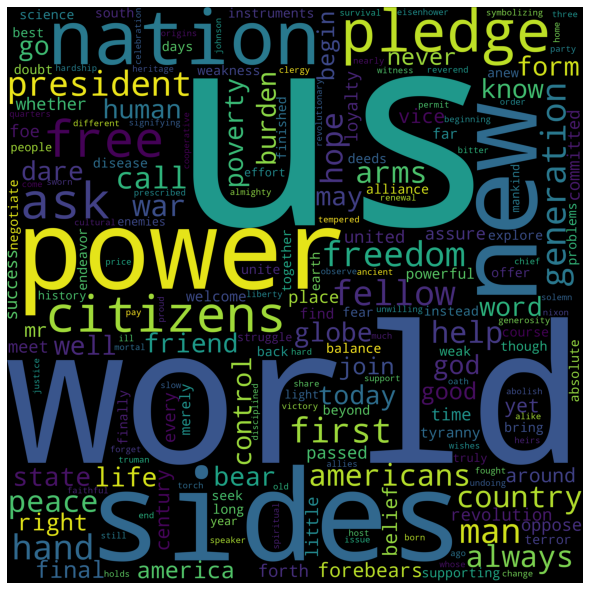

In [898]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President John F. Kennedy's Speech")
plt.show()

In [899]:
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(WC_Nixon)

Word Cloud for President Richard Nixon's Speech


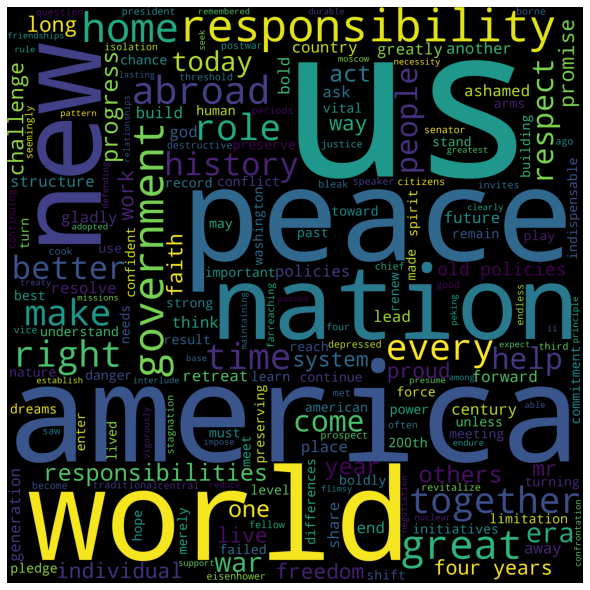

In [900]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Richard Nixon's Speech")
plt.show()